In [23]:
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import csv # read 
import numpy as np #linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [3]:
train = pd.read_csv('../dataset/train.csv', sep=',', na_values='.') #read csv file, seperated by ;, na values exists
train #show data

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,5.988956e-01,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00
3,6,1,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,2.267384e-03,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
5,9,0,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,...,NaN,NaN,4.986116e-02,X,NaN,NaN,1.536222,0,NaN,NaN
6,12,0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,8.375832e-02,BJ,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01
7,21,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BY,NaN,NaN,NaN,0,NaN,NaN
8,22,0,2.078651e+00,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148,1.875560,1.865950e-02,S,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00
9,23,1,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000e+00


In [14]:
"Read test set"
test = pd.read_csv('../dataset/test.csv')

In [5]:
"Check the shape of train and test data"
print('Train data size: '+str(train.shape)) #train shape
print('Test data size: '+str(test.shape)) #test shape

Train data size: (114321, 133)
Test data size: (114393, 132)


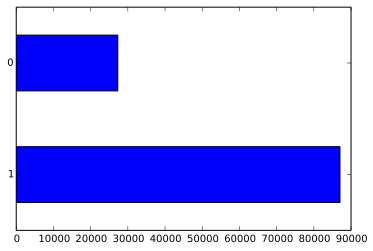

In [24]:
train.target.value_counts().plot.barh() #target variable
plt.savefig('plot1.eps')

NameError: name 'savefig' is not defined

In [6]:
count_1 = 0
count_0 = 0
for i in range (0,len(train['target'])):
    if train['target'][i] == 1:
        count_1 =count_1+1
    else:
        count_0 =count_0+1

In [7]:
count_1

87021

In [8]:
count_0

27300

In [9]:
train.target.value_counts().plot.bar() #target variable

In [10]:
test_numr =test.select_dtypes(include=[np.number])
test_char =test.select_dtypes(include=[np.object])
print("Numerical column count : {}".format(test_numr.shape[1]))
print("Category column count : {}".format(test_char.shape[1]))

Numerical column count : 113
Category column count : 19


In [11]:
for col in  test_char:
    print(col+" : " +str(test_char[col].unique()))

v3 : ['C' nan 'B' 'A']
v22 : ['AFPB' 'FOG' 'HXZ' ..., 'VQW' 'QEN' 'WCS']
v24 : ['E' 'D' 'B' 'C' 'A']
v30 : [nan 'A' 'C' 'E' 'D' 'G' 'F' 'B']
v31 : ['A' 'B' nan 'C']
v47 : ['J' 'C' 'I' 'G' 'F' 'D' 'E' 'A' 'B']
v52 : ['C' 'A' 'H' 'D' 'L' 'G' 'B' 'I' 'J' 'F' 'E' 'K' nan]
v56 : ['AF' 'DI' 'DO' 'CN' nan 'DP' 'BJ' 'BW' 'U' 'AS' 'BL' 'DJ' 'CY' 'BK' 'CP'
 'BZ' 'P' 'CS' 'DF' 'AW' 'AG' 'BM' 'DH' 'V' 'G' 'DS' 'DY' 'BV' 'BX' 'CI'
 'BY' 'N' 'A' 'DX' 'AN' 'DA' 'AL' 'Y' 'AO' 'Z' 'AZ' 'AR' 'CM' 'BA' 'R' 'DR'
 'DN' 'DL' 'CF' 'BQ' 'BS' 'AA' 'AI' 'DW' 'BU' 'DM' 'AU' 'CT' 'CA' 'DK' 'BG'
 'BH' 'BF' 'CH' 'BI' 'CC' 'W' 'AK' 'BD' 'C' 'DQ' 'CW' 'CB' 'DZ' 'DT' 'CO'
 'F' 'DG' 'CD' 'D' 'AY' 'T' 'DE' 'BN' 'DV' 'AJ' 'B' 'CX' 'AE' 'DU' 'AH'
 'AM' 'K' 'CJ' 'CQ' 'O' 'BC' 'BT' 'Q' 'BP' 'J' 'CV' 'AC' 'AV' 'AQ' 'CL'
 'BR' 'E' 'CR' 'BE' 'DD' 'CU' 'AD' 'BB' 'AB' 'M' 'S']
v66 : ['A' 'C' 'B']
v71 : ['F' 'B' 'C' 'I' 'E' 'G' 'J' 'L' 'H']
v74 : ['B' 'C' 'A']
v75 : ['D' 'B' 'A' 'C']
v79 : ['Q' 'E' 'C' 'M' 'H' 'B' 'K' 'J' 'P' 'I'

In [12]:
train_numr =train.select_dtypes(include=[np.number])
train_char =train.select_dtypes(include=[np.object])
print("Numerical column count : {}".format(train_numr.shape[1]))
print("Category column count : {}".format(train_char.shape[1]))

Numerical column count : 114
Category column count : 19


In [13]:
"look at charcter features"
for col in  train_char:
    print(col+" : " +str(train_char[col].unique()))

v3 : ['C' nan 'A' 'B']
v22 : ['XDX' 'GUV' 'FQ' ..., 'WMF' 'BXZ' 'PQH']
v24 : ['C' 'E' 'D' 'A' 'B']
v30 : ['C' nan 'G' 'D' 'B' 'F' 'A' 'E']
v31 : ['A' 'B' nan 'C']
v47 : ['C' 'E' 'I' 'D' 'F' 'G' 'J' 'B' 'A' 'H']
v52 : ['G' 'F' 'H' 'K' 'A' 'C' 'E' 'J' 'D' 'I' 'L' 'B' nan]
v56 : ['DI' 'DY' 'AS' 'BW' nan 'DX' 'DP' 'AF' 'CY' 'AW' 'AL' 'AZ' 'Z' 'DN' 'BQ'
 'BM' 'AG' 'BJ' 'BV' 'R' 'BL' 'CN' 'U' 'N' 'V' 'BU' 'P' 'DO' 'BZ' 'DL' 'DS'
 'DF' 'DH' 'DJ' 'BA' 'BS' 'BX' 'DZ' 'BK' 'CO' 'CI' 'G' 'CC' 'DM' 'AI' 'AK'
 'DA' 'Y' 'A' 'CM' 'DR' 'AN' 'H' 'CS' 'AO' 'CF' 'AR' 'CP' 'BD' 'BI' 'BH'
 'CH' 'BG' 'C' 'CA' 'AP' 'AA' 'CV' 'DG' 'DK' 'CL' 'AH' 'DE' 'CQ' 'DQ' 'BF'
 'W' 'AV' 'AU' 'F' 'CB' 'AY' 'CT' 'B' 'BY' 'AC' 'DU' 'AT' 'E' 'BC' 'CX' 'Q'
 'CW' 'BR' 'CK' 'BE' 'DV' 'BP' 'I' 'CJ' 'AE' 'DT' 'AM' 'O' 'CZ' 'DB' 'CG'
 'X' 'AJ' 'M' 'AX' 'DW' 'L' 'BN' 'CE' 'T' 'CD' 'AB' 'BO' 'DD' 'BT' 'D' 'DC']
v66 : ['C' 'A' 'B']
v71 : ['F' 'B' 'C' 'L' 'I' 'A' 'G' 'K' 'D']
v74 : ['B' 'C' 'A']
v75 : ['D' 'B' 'C' 'A']
v79 : ['E' 'D' 

In [14]:
"Null Value Percentage"
nullvalues = [float((train[col].isnull().sum()))/len(train[col])
              for col in train.columns.values]
percentagenull = list(zip(train.columns.values, nullvalues))

print percentagenull

[('ID', 0.0), ('target', 0.0), ('v1', 0.4358954172899117), ('v2', 0.43558051451614316), ('v3', 0.030239413581056848), ('v4', 0.43558051451614316), ('v5', 0.42532867977012095), ('v6', 0.4358954172899117), ('v7', 0.4358954172899117), ('v8', 0.4252849432737642), ('v9', 0.4360616159760674), ('v10', 0.0007347731387933975), ('v11', 0.43593040648699716), ('v12', 0.0007522677373360975), ('v13', 0.4358954172899117), ('v14', 3.498919708539988e-05), ('v15', 0.43593040648699716), ('v16', 0.4364464971440068), ('v17', 0.43558051451614316), ('v18', 0.4358954172899117), ('v19', 0.4359916375818966), ('v20', 0.43596539568408255), ('v21', 0.005344599854794832), ('v22', 0.004373649635674985), ('v23', 0.4432693905756598), ('v24', 0.0), ('v25', 0.4252849432737642), ('v26', 0.4358954172899117), ('v27', 0.4358954172899117), ('v28', 0.4358954172899117), ('v29', 0.4358954172899117), ('v30', 0.5258001592008468), ('v31', 0.030239413581056848), ('v32', 0.4358954172899117), ('v33', 0.4358954172899117), ('v34', 0.00

In [15]:
percentagenull[2][0]

'v1'

In [16]:
nullplot=pd.DataFrame(data=percentagenull,columns=["features","percantage of missing value"])
nullplot=nullplot.set_index("features")
nullplot.plot.barh(figsize =(15,15),title="percantage of missing value of each feature")

In [18]:
len(test_numr.columns.values[0:60])

60

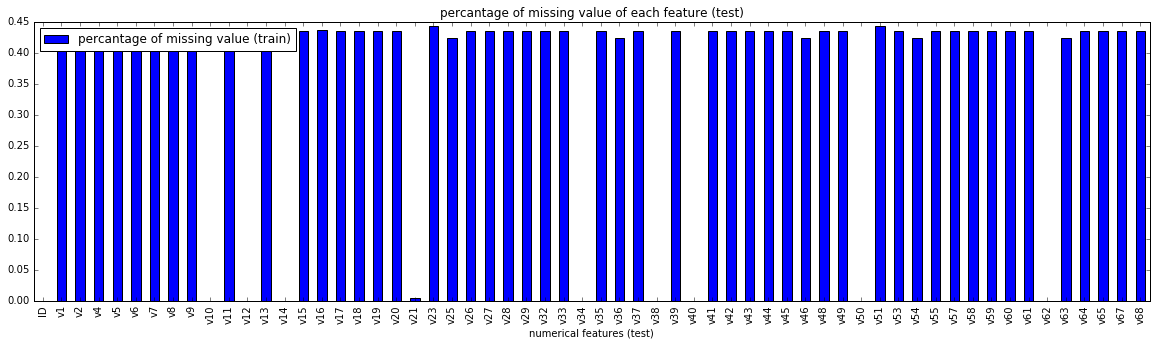

In [19]:
nullvalues = [float((test_numr[col].isnull().sum()))/len(test_numr[col])
              for col in test_numr.columns.values[0:60]]
percentagenull = list(zip(test_numr.columns.values[0:60], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["numerical features (test)","percantage of missing value (train)"])
nullplot=nullplot.set_index("numerical features (test)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (test)")

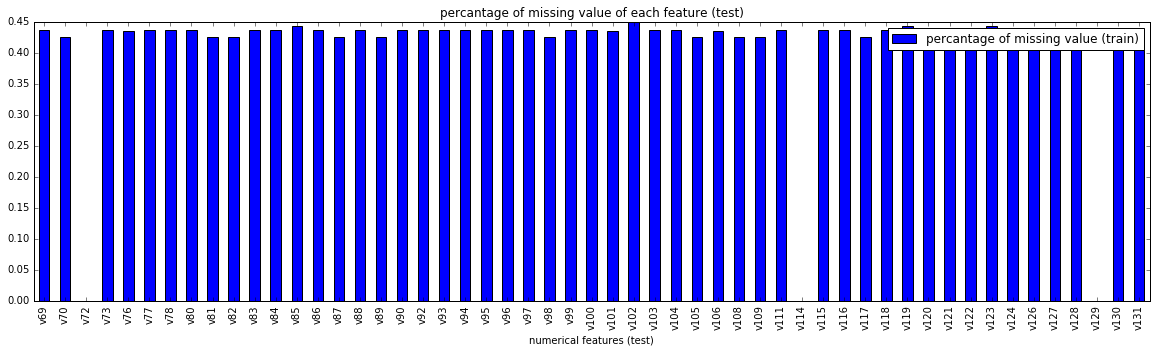

In [20]:
nullvalues = [float((test_numr[col].isnull().sum()))/len(test_numr[col])
              for col in test_numr.columns.values[60:134]]
percentagenull = list(zip(test_numr.columns.values[60:134], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["numerical features (test)","percantage of missing value (train)"])
nullplot=nullplot.set_index("numerical features (test)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (test)")

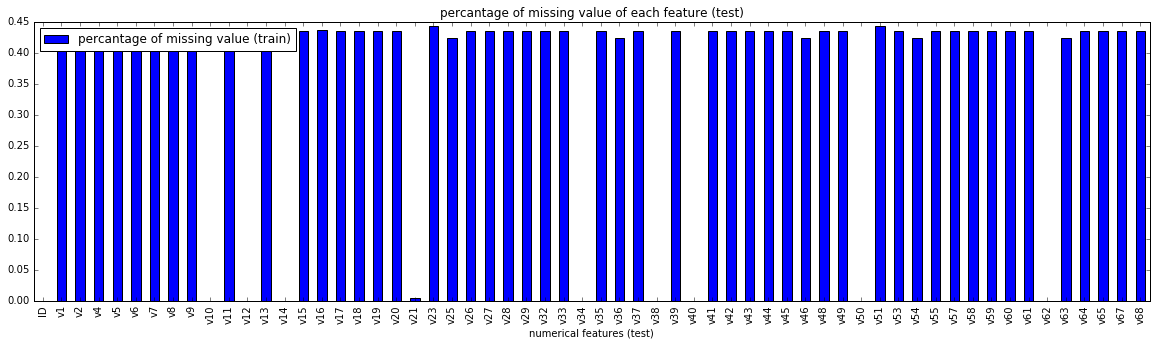

In [21]:
nullvalues = [float((test_numr[col].isnull().sum()))/len(test_numr[col])
              for col in test_numr.columns.values[0:60]]
percentagenull = list(zip(test_numr.columns.values[0:60], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["numerical features (test)","percantage of missing value (train)"])
nullplot=nullplot.set_index("numerical features (test)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (test)")

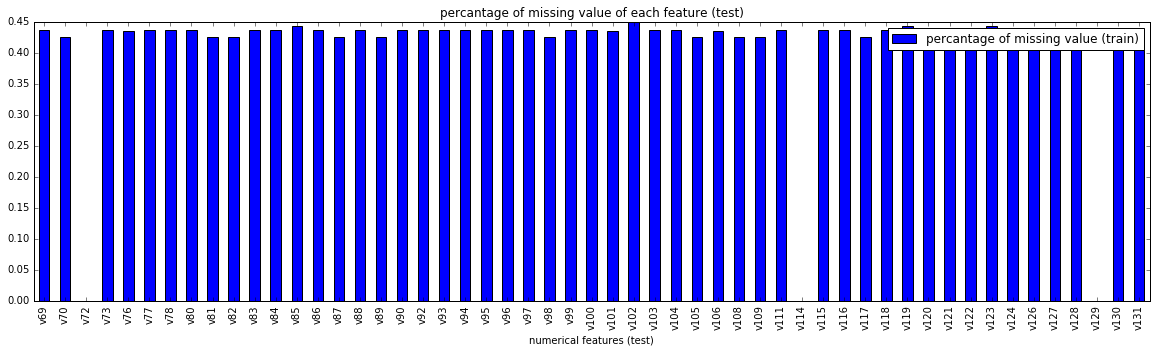

In [22]:
nullvalues = [float((test_numr[col].isnull().sum()))/len(test_numr[col])
              for col in test_numr.columns.values[60:133]]
percentagenull = list(zip(test_numr.columns.values[60:133], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["numerical features (test)","percantage of missing value (train)"])
nullplot=nullplot.set_index("numerical features (test)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (test)")

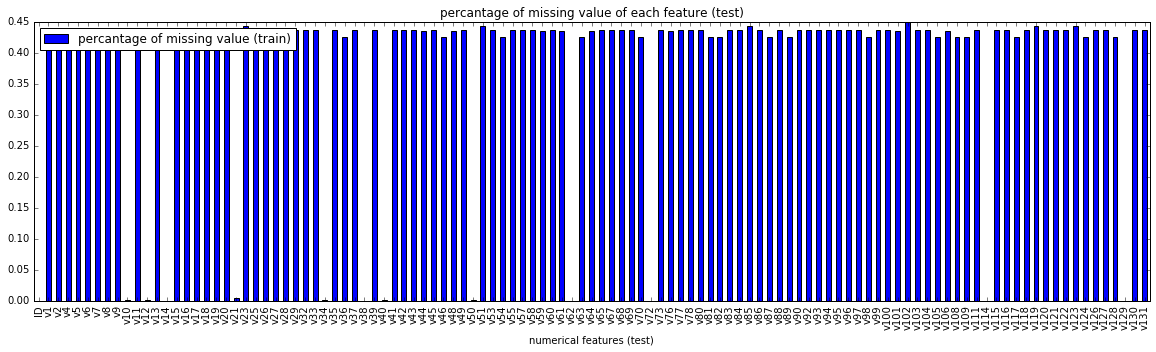

In [23]:
nullvalues = [float((test_numr[col].isnull().sum()))/len(test_numr[col])
              for col in test_numr.columns.values]
percentagenull = list(zip(test_numr.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["numerical features (test)","percantage of missing value (train)"])
nullplot=nullplot.set_index("numerical features (test)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (test)")

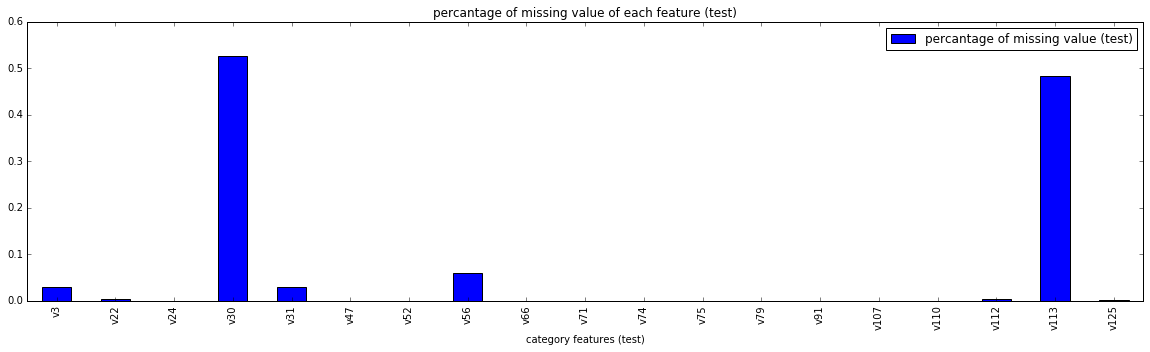

In [24]:
nullvalues = [float((test_char[col].isnull().sum()))/len(test_char[col])
              for col in test_char.columns.values]
percentagenull = list(zip(test_char.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["category features (test)","percantage of missing value (test)"])
nullplot=nullplot.set_index("category features (test)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (test)")

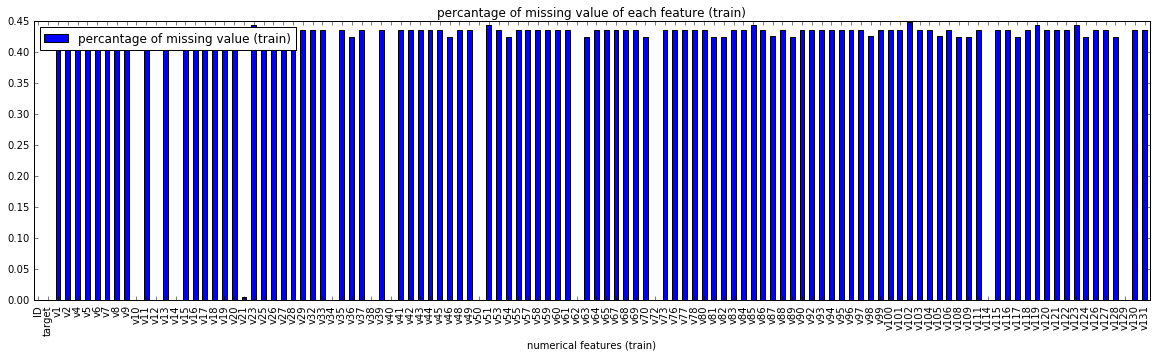

In [25]:
nullvalues = [float((train_numr[col].isnull().sum()))/len(train_numr[col])
              for col in train_numr.columns.values]
percentagenull = list(zip(train_numr.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["numerical features (train)","percantage of missing value (train)"])
nullplot=nullplot.set_index("numerical features (train)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (train)")

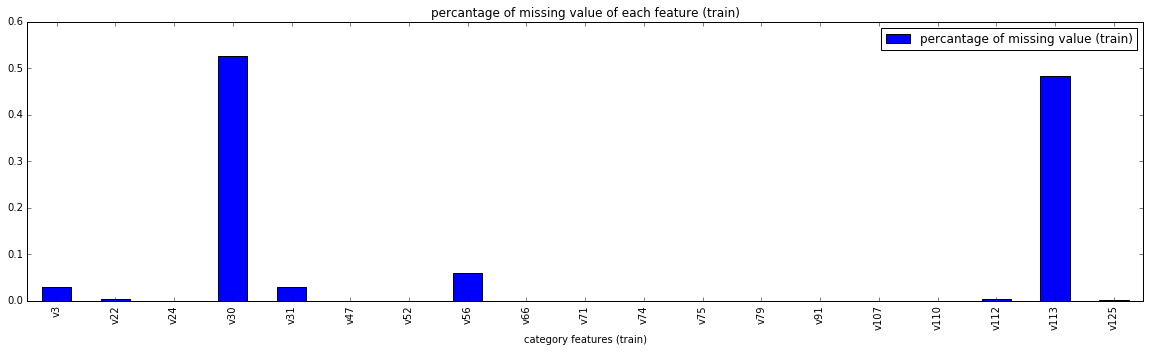

In [26]:
nullvalues = [float((train_char[col].isnull().sum()))/len(train_char[col])
              for col in train_char.columns.values]
percentagenull = list(zip(train_char.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["category features (train)","percantage of missing value (train)"])
nullplot=nullplot.set_index("category features (train)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (train)")

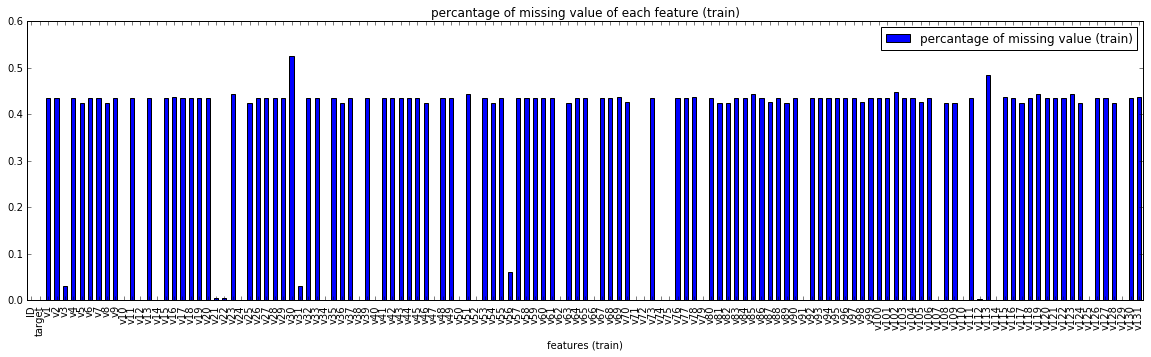

In [27]:
nullvalues = [float((train[col].isnull().sum()))/len(train[col])
              for col in train.columns.values]
percentagenull = list(zip(train.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["features (train)","percantage of missing value (train)"])
nullplot=nullplot.set_index("features (train)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (train)")

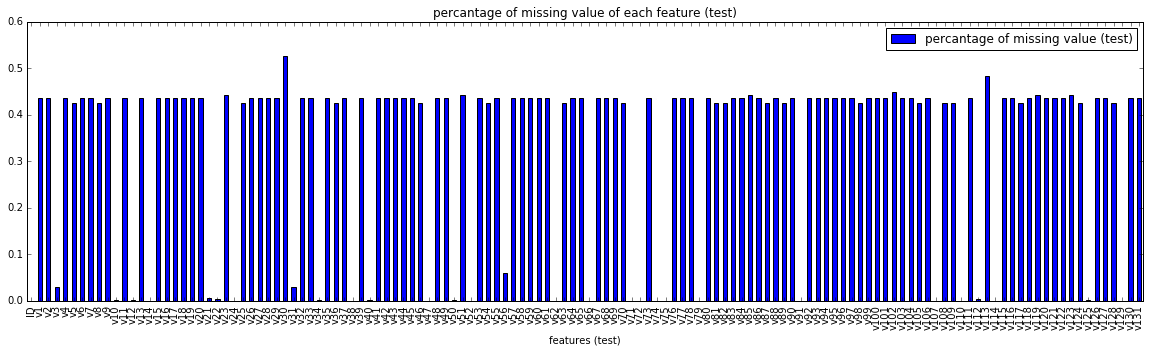

In [28]:
nullvalues = [float((test[col].isnull().sum()))/len(test[col])
              for col in test.columns.values]
percentagenull = list(zip(test.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["features (test)","percantage of missing value (test)"])
nullplot=nullplot.set_index("features (test)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (test)")

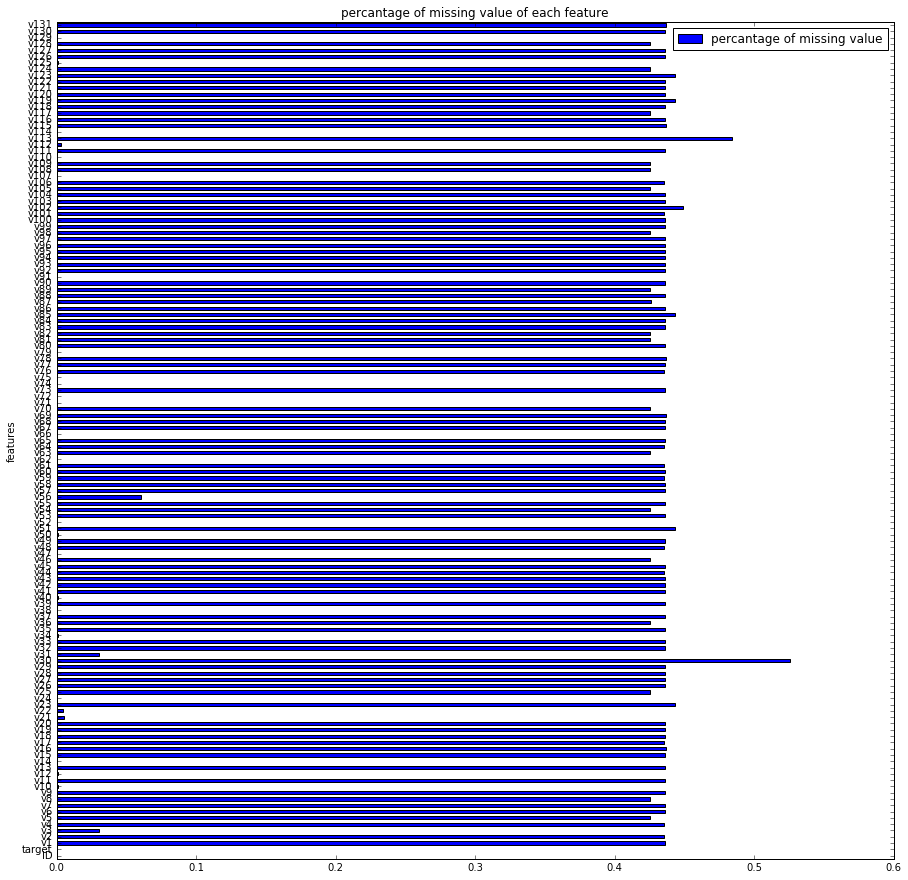

In [29]:
nullvalues = [float((train[col].isnull().sum()))/len(train[col])
              for col in train.columns.values]
percentagenull = list(zip(train.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["features","percantage of missing value"])
nullplot=nullplot.set_index("features")
nullplot.plot.barh(figsize =(15,15),title="percantage of missing value of each feature")

In [30]:
count_row = train.shape[0]
count_col = train.shape[1]
print count_row, count_col

114321 133


In [31]:
arr = [[1, 2, 3]]
print arr

[[1, 2, 3]]


In [32]:
print map(list,zip(*arr))

[[1], [2], [3]]


In [33]:
print [[r[col] for r in arr] for col in range(len(arr[0]))]

[[1], [2], [3]]


In [34]:
a=[['v1', 'v2',' v3'],['a', 2, 3],['b', 2, 3]]
print a
del a[:1]
print a

[['v1', 'v2', ' v3'], ['a', 2, 3], ['b', 2, 3]]
[['a', 2, 3], ['b', 2, 3]]
